# Vid1 : NLP fundamentals
# Vid2 : NLP Pipeline
# Vid3 : text preprocessing

In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("./data/IMDBDataset.csv")

In [5]:
df.shape

(50000, 2)

In [6]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
df['review'][3].lower()

"basically there's a family where a little boy (jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />this movie is slower than a soap opera... and suddenly, jake decides to become rambo and kill the zombie.<br /><br />ok, first of all when you're going to make a film you must decide if its a thriller or a drama! as a drama the movie is watchable. parents are divorcing & arguing like in real life. and then we have jake with his closet which totally ruins all the film! i expected to see a boogeyman similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. as for the shots with jake: just ignore them."

In [10]:
#lowercasing
df['review'] = df['review'].str.lower()

In [11]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [12]:
#removing html tags 
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [13]:
remove_html_tags(df['review'][1])

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [14]:
df['review'] = df['review'].apply(remove_html_tags)

In [15]:
df.head()

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. the filming tec...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [25]:
# remove URLs
text1 = ' www.google.com'

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [26]:
remove_url(text1)

' '

In [27]:
df['review'] = df['review'].apply(remove_url)

In [31]:
!pip3 install string.time

ERROR: Could not find a version that satisfies the requirement string.time
ERROR: No matching distribution found for string.time


In [38]:
#remove punctuations 
def remove_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)

In [39]:
remove_punctuations(".,/:;")

''

In [40]:
df['review'] = df['review'].apply(remove_punctuations)

In [42]:
df.sample(5)

review sentiment
25912  new best friend is another entry in the steal ...  negative
43445  after highlander 2 which i am still in denial ...  negative
19338  less than 10 minutes into this film i wanted i...  negative
18841  this is an excellent example of what can be do...  positive
10437  i was duped as well here i was expecting all s...  negative

In [56]:
# chat word treatment
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mfw" : "my face when",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}
def chat_word_treatment(text):
    new_text = []
    for w in text.split():
        if w.lower() in abbreviations:
            new_text.append(abbreviations[w.lower()])
        else :
            new_text.append(w)
    return " ".join(new_text)

In [61]:
chat_word_treatment("asap , zzz fyi")

'as soon as possible , sleeping bored and tired for your information'

In [62]:
df['review'] = df['review'].apply(chat_word_treatment)

In [69]:
#!pip install TextBlob

In [68]:
#spelling correction
from textblob import TextBlob
textBlb = TextBlob('ceertain')
textBlb.correct().string

'certain'

In [70]:
def spell_correct(text):
    new_text = []
    for w in text.split():
        textBlb = TextBlob(w)
        new_text.append(textBlb.correct().string)
    return " ".join(new_text)

In [71]:
spell_correct("ceertain ceertain")

'certain certain'

In [72]:
df['review'] = df['review'].apply(spell_correct)

KeyboardInterrupt: 

In [75]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/neelchoksi19bce0990/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [76]:
def remove_stopwords(text):
    new_text=[]
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else :
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [79]:
remove_stopwords("a the for she it kuch toh ")

'     kuch toh'

In [82]:
df['review'] = df['review'].apply(remove_stopwords)

KeyboardInterrupt: 

In [81]:
#emoji handling
import emoji
print(emoji.demojize("Python is 🔥"))

ModuleNotFoundError: No module named 'emoji'

In [84]:
#Tokenization 
sent1 = "I ada ad fa dfa df!"
sent1.split()

['I', 'ada', 'ad', 'fa', 'dfa', 'df!']

In [85]:
import re 
tokens = re.findall("[\w']+",sent1)
tokens

['I', 'ada', 'ad', 'fa', 'dfa', 'df']

In [87]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
word_tokenize(sent1)

[nltk_data] Downloading package punkt to
[nltk_data]     /home/neelchoksi19bce0990/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I', 'ada', 'ad', 'fa', 'dfa', 'df', '!']

In [89]:
!pip3 install -U spacy

     |████████████████████████████████| 6.4 MB 511 kB/s eta 0:00:01
     |████████████████████████████████| 459 kB 501 kB/s eta 0:00:01
     |████████████████████████████████| 813 kB 500 kB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 573 kB/s eta 0:00:01
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.2
    Uninstalling srsly-2.4.2:
      Successfully uninstalled srsly-2.4.2
  Attempting uninstall: wasabi
    Found existing installation: wasabi 0.9.0
    Uninstalling wasabi-0.9.0:
      Successfully uninstalled wasabi-0.9.0
  Attempting uninstall: blis
    Found existing installation: blis 0.7.6
    Uninstalling blis-0.7.6:
      Successfully uninstalled blis-0.7.6
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.15
    Uninstalling thinc-8.0.15:
      Successfully uninstalled thinc-8.0.15
  Attempting uninstall: spacy
    Found existing installation: spacy 3.2.4
    Uninstalling spacy-3.2.4:
      Successfully uninstal

In [91]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 530 kB/s eta 0:00:01     |█████████████████████████████▎  | 11.7 MB 500 kB/s eta 0:00:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [92]:
!python3 -m spacy validate

ERROR! Session/line number was not unique in database. History logging moved to new session 108
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.4.1) =================
ℹ spaCy installation:
/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/spacy

NAME             SPACY            VERSION                            
en_core_web_sm   >=3.4.0,<3.5.0   3.4.0   ✔



In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [93]:
doc1 = nlp(sent1)
for token in doc1:
    print(token)

NameError: name 'nlp' is not defined

ERROR! Session/line number was not unique in database. History logging moved to new session 109


In [94]:
#stemming:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [95]:
sample = "walk walks walking walked"
stem_words(sample)

'walk walk walk walk'

In [96]:
df['review'] = df['review'].apply(stem_words)

In [99]:
from nltk.stem import WordNetLemmatizer 
wordnet_lemmatizer = WordNetLemmatizer()

sent = "walking playing eating eat"
sent_words = nltk.word_tokenize(sent)
sent_words

['walking', 'playing', 'eating', 'eat']

In [101]:
for word in sent_words :
    print("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word,pos='v')))

walking             walk                
playing             play                
eating              eat                 
eat                 eat                 


# Vid 4 : Text representation

In [1]:
import numpy as np 
import pandas as pd

In [4]:
df = pd.read_csv("./data/IMDBDataset.csv")
df.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [5]:
bow = cv.fit_transform(df['review'])

In [8]:
#vocab 
print(cv.vocabulary_)

{'one': 64131, 'of': 63757, 'the': 90160, 'other': 64776, 'reviewers': 75511, 'has': 40745, 'mentioned': 57558, 'that': 90137, 'after': 2970, 'watching': 98226, 'just': 48473, 'oz': 65469, 'episode': 30113, 'you': 101096, 'll': 53223, 'be': 8758, 'hooked': 42850, 'they': 90347, 'are': 5707, 'right': 75915, 'as': 6166, 'this': 90455, 'is': 46765, 'exactly': 30975, 'what': 98847, 'happened': 40445, 'with': 99740, 'me': 56982, 'br': 12041, 'first': 33526, 'thing': 90399, 'struck': 86597, 'about': 1866, 'was': 98149, 'its': 46954, 'brutality': 12974, 'and': 4541, 'unflinching': 94620, 'scenes': 78746, 'violence': 97142, 'which': 98951, 'set': 80312, 'in': 44763, 'from': 35408, 'word': 100095, 'go': 37795, 'trust': 92962, 'not': 62917, 'show': 81437, 'for': 34443, 'faint': 31918, 'hearted': 41171, 'or': 64417, 'timid': 90979, 'pulls': 71592, 'no': 62551, 'punches': 71639, 'regards': 74108, 'to': 91217, 'drugs': 27443, 'sex': 80408, 'hardcore': 40507, 'classic': 17536, 'use': 95817, 'it': 46

In [18]:
bow

<50000x101895 sparse matrix of type '<class 'numpy.int64'>'
	with 6826529 stored elements in Compressed Sparse Row format>

In [19]:
df_bow = pd.DataFrame(bow[0].toarray())

In [20]:
df_bow.head(2)

0       1       2       3       4       5       6       7       8       \
0       0       0       0       0       0       0       0       0       0   

   9       ...  101885  101886  101887  101888  101889  101890  101891  \
0       0  ...       0       0       0       0       0       0       0   

   101892  101893  101894  
0       0       0       0  

[1 rows x 101895 columns]

In [21]:
bow[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [22]:
bow[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [23]:
cv_bigram = CountVectorizer(ngram_range=(2,2))
bow_bigram = cv_bigram.fit_transform(df['review'])

In [26]:
print(cv_bigram.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
bow_bigram[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [27]:
cv_tillTri = CountVectorizer(ngram_range=(1,3))
bow_tillTri = cv_tillTri.fit_transform(df['review'])

In [28]:
print(cv_tillTri.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
df_reduced = df.sample(1000)
df_reduced.shape

(1000, 2)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit_transform(df_reduced['review']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
print(tfidf.idf_)
print(tfidf.get_feature_names_out())

[6.11699531 5.60616969 7.2156076  ... 7.2156076  7.2156076  7.2156076 ]
['00' '000' '007' ... 'zzzzzzzzz' 'élan' 'émigré']


# Vid 5 : Word2Vec

In [37]:
!pip3 install gensim

     |████████████████████████████████| 24.0 MB 127 kB/s eta 0:00:01


In [39]:
import gensim 
from gensim.models import Word2Vec,KeyedVectors

In [38]:
!pip3 install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=b5649c9dc6f775d73f2e928af2e3ce1e206752f3d40f36176e5315c2842e1aee
  Stored in directory: /home/neelchoksi19bce0990/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [41]:
!wget -c "https://s3.amazonaws.com/d14j-distribution/GoogleNews-vectors-negaitve300.bin.gz"

--2022-10-05 14:43:06--  https://s3.amazonaws.com/d14j-distribution/GoogleNews-vectors-negaitve300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.128.160
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.128.160|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-10-05 14:43:07 ERROR 404: Not Found.



In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)

In [ ]:
model['man'].shape

In [ ]:
model['man']

In [ ]:
model.most_similar('man')

In [ ]:
model.most_similar('cricket')

In [ ]:
model.most_similar('facebook')

In [ ]:
model.similarity('man','women')

In [ ]:
model.doesnt_match('PHP','java','monkey')

In [ ]:
vec = model['king'] - model['man'] + model['women']
model.most_similar([vec])

In [ ]:
vec2 = model['INR'] - model['India'] + model['England']
model.most_similar([vec2])

In [51]:
df_reduced['review'].iloc[1]

'Andrew McCarthy played the role of an atheist very well. I liked the plot of the movie. It gave something to think about other than a comedy. It had a very twisted mind and a good cop versus God. A very well used plot line.'

In [58]:
from nltk import sent_tokenize 
from gensim.utils import simple_preprocess 

corpus = [] 
for i in range(0,1000):
    raw_sent = df_reduced['review'].iloc[i]
    corpus.append(simple_preprocess(raw_sent))

In [59]:
len(corpus)

1000

In [60]:
corpus

[['remember',
  'hearing',
  'about',
  'this',
  'movie',
  'and',
  'how',
  'it',
  'played',
  'at',
  'nearly',
  'every',
  'drive',
  'in',
  'theatre',
  'here',
  'in',
  'toronto',
  'it',
  'about',
  'group',
  'of',
  'girls',
  'that',
  'are',
  'not',
  'accepted',
  'by',
  'the',
  'other',
  'sororities',
  'at',
  'their',
  'college',
  'so',
  'they',
  'start',
  'up',
  'their',
  'own',
  'and',
  'of',
  'course',
  'call',
  'it',
  'it',
  'fun',
  'movie',
  'that',
  'is',
  'just',
  'bursting',
  'with',
  'drive',
  'in',
  'nostalgia',
  'lots',
  'of',
  'fully',
  'endowed',
  'shirts',
  'vans',
  'fighting',
  'and',
  'football',
  'game',
  'showdown',
  'like',
  'no',
  'other',
  'it',
  'been',
  'compared',
  'to',
  'animal',
  'house',
  'which',
  'is',
  'good',
  'movie',
  'in',
  'it',
  'own',
  'right',
  'but',
  'to',
  'me',
  'nothing',
  'compares',
  'to',
  'it',
  'has',
  'it',
  'own',
  'brand',
  'of',
  'fun',
  'charac

In [61]:
model_w2v = gensim.models.Word2Vec(
    window = 10,
    min_count = 2,
    workers = 4
)

In [62]:
model_w2v.build_vocab(corpus)

In [63]:
model_w2v.train(corpus , total_examples = model_w2v.corpus_count,epochs=model_w2v.epochs)

(837665, 1158955)

In [65]:
model_w2v.wv.most_similar('movie')

[('bad', 0.9787560105323792),
 ('good', 0.9740321636199951),
 ('viewed', 0.9649140238761902),
 ('it', 0.9604395627975464),
 ('this', 0.9581952095031738),
 ('film', 0.956930935382843),
 ('really', 0.9520705938339233),
 ('daring', 0.9509503841400146),
 ('me', 0.9494487643241882),
 ('lion', 0.9473859667778015)]

In [66]:
model_w2v.wv.doesnt_match(['bad','good','popcorn'])

'popcorn'

In [67]:
model_w2v.wv['movie']

array([-2.16745093e-01,  3.09792403e-02, -2.20135778e-01, -3.74437064e-01,
        1.15380682e-01, -4.25960869e-01,  5.20474374e-01,  9.00501728e-01,
       -1.17186236e+00, -2.27635354e-01, -1.94961354e-01, -5.62278450e-01,
       -2.28208184e-01,  5.13939798e-01, -5.85881233e-01,  2.02922359e-01,
       -1.76634975e-02,  4.71521802e-02, -5.67571700e-01, -2.25937462e+00,
        1.01880014e+00,  4.82085258e-01,  8.09836388e-01, -1.16159104e-01,
       -4.59605873e-01, -2.78922021e-01,  4.77888286e-02, -1.02426851e+00,
       -6.78457141e-01, -3.32780600e-01,  5.02996922e-01,  1.46993652e-01,
        7.74252117e-01, -1.46149719e+00,  4.21865024e-02,  9.88489449e-01,
        9.40043688e-01,  2.41651684e-02, -2.93629795e-01, -7.77827680e-01,
        1.05587888e+00, -1.05964553e+00,  1.07639238e-01, -2.44631007e-01,
        4.80646551e-01,  1.31924734e-01, -1.31747639e+00,  2.07163230e-01,
        1.07828081e+00,  3.54520053e-01,  1.43734783e-01, -4.97518778e-01,
        2.87584126e-01, -

In [68]:
model_w2v.wv.similarity('good','movie')

0.97403216

In [69]:
model_w2v.wv.similarity('bad','movie')

0.97875607

In [70]:
model_w2v.wv.similarity('good','bad')

0.9890983

In [71]:
model_w2v.wv.get_normed_vectors()

array([[ 0.00182833,  0.08110332,  0.0408151 , ..., -0.10627206,
        -0.01709636,  0.01924197],
       [-0.0346451 ,  0.07750568,  0.0487576 , ..., -0.10989702,
        -0.02651133,  0.01420235],
       [ 0.00656322,  0.07585867,  0.02682487, ..., -0.09197797,
         0.01558722,  0.00451586],
       ...,
       [-0.0289483 ,  0.02448951,  0.07461213, ..., -0.11352976,
        -0.00161307,  0.00042931],
       [-0.03312029,  0.06677713,  0.02625516, ..., -0.08213507,
         0.00368757,  0.02872175],
       [-0.00086849, -0.07270725, -0.06884914, ..., -0.13718656,
        -0.01618714, -0.03512844]], dtype=float32)

In [72]:
y = model_w2v.wv.index_to_key

In [74]:
len(y)

9612

In [75]:
y

['the',
 'and',
 'of',
 'to',
 'is',
 'br',
 'it',
 'in',
 'this',
 'that',
 'was',
 'as',
 'with',
 'but',
 'movie',
 'for',
 'film',
 'on',
 'you',
 'he',
 'not',
 'his',
 'are',
 'have',
 'be',
 'one',
 'at',
 'by',
 'all',
 'an',
 'who',
 'they',
 'her',
 'from',
 'like',
 'so',
 'or',
 'there',
 'about',
 'out',
 'has',
 'if',
 'some',
 'just',
 'she',
 'good',
 'what',
 'can',
 'more',
 'when',
 'my',
 'very',
 'even',
 'up',
 'really',
 'time',
 'which',
 'no',
 'only',
 'would',
 'we',
 'story',
 'me',
 'their',
 'were',
 'see',
 'had',
 'bad',
 'well',
 'much',
 'get',
 'him',
 'most',
 'how',
 'other',
 'don',
 'because',
 'been',
 'will',
 'first',
 'than',
 'make',
 'great',
 'also',
 'do',
 'too',
 'then',
 'way',
 'people',
 'any',
 'made',
 'them',
 'into',
 'could',
 'its',
 'many',
 'films',
 'characters',
 'after',
 'think',
 'life',
 'plot',
 'watch',
 'character',
 'acting',
 'two',
 'where',
 'movies',
 'being',
 'never',
 'seen',
 'off',
 'best',
 'man',
 'over',


In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=3)

In [78]:
X = pca.fit_transform(model_w2v.wv.get_normed_vectors())

In [79]:
X[:5]

array([[-0.14785722,  0.1608097 ,  0.3177287 ],
       [-0.22301573,  0.1239313 , -0.01816178],
       [-0.1491731 ,  0.13656458,  0.2813647 ],
       [ 0.01632628, -0.07154521, -0.32427093],
       [-0.03421941,  0.02672109,  0.30590037]], dtype=float32)

In [80]:
X.shape

(9612, 3)

In [82]:
import plotly.express as px
fig = px.scatter_3d(X[:100], x=0, y=1, z=2, color=y[:100])
fig.show()

# Vid 6 : TextClassif - ML Models 

In [83]:
df_reduced_2 = df[:10000]

In [85]:
df_reduced_2.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [87]:
df_reduced_2['sentiment'].value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

In [88]:
df_reduced_2.isnull().sum()

review       0
sentiment    0
dtype: int64

In [89]:
df_reduced_2.duplicated().sum()

17

In [90]:
df_reduced_2.drop_duplicates(inplace=True)

/tmp/ipykernel_54560/221138717.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
df_reduced_2.duplicated().sum()

0

In [92]:
#basic preprocessing 
import re 
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),'',raw_text)
    return cleaned_text

In [93]:
df_reduced_2['review'] = df_reduced_2['review'].apply(remove_tags)

/tmp/ipykernel_54560/2859453972.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
df_reduced_2.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive

In [97]:
df_reduced_2['review'] = df_reduced_2['review'].apply(lambda x : x.lower())

/tmp/ipykernel_54560/700142003.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_reduced_2['review'].head(2)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
Name: review, dtype: object

In [99]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')
df_reduced_2['review'] = df_reduced_2['review'].apply(lambda x :[item for item in x.split() if item not in sw_list]).apply(lambda x : " ".join(x))

/tmp/ipykernel_54560/634139926.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
df_reduced_2['review'].head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production. filming technique...
2    thought wonderful way spend time hot summer we...
3    basically there's family little boy (jake) thi...
4    petter mattei's "love time money" visually stu...
Name: review, dtype: object

In [101]:
X = df_reduced_2.iloc[:,0:1]
y = df_reduced_2['sentiment']

In [102]:
X

review
0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production. filming technique...
2     thought wonderful way spend time hot summer we...
3     basically there's family little boy (jake) thi...
4     petter mattei's "love time money" visually stu...
...                                                 ...
9995  fun, entertaining movie wwii german spy (julie...
9996  give break. anyone say "good hockey movie"? kn...
9997  movie bad movie. watching endless series bad h...
9998  movie probably made entertain middle school, e...
9999  smashing film film-making. shows intense stran...

[9983 rows x 1 columns]

In [103]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 9983, dtype: object

In [104]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [105]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [108]:
X_train.shape

(7986, 1)

In [109]:
# bow 
from sklearn.feature_extraction.text import CountVectorizer 

In [110]:
cv = CountVectorizer()

In [111]:
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

In [112]:
X_train_bow.shape

(7986, 48282)

In [113]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [114]:
y_pred = gnb.predict(X_test_bow)

In [115]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)

0.6324486730095142

In [116]:
confusion_matrix(y_test,y_pred)

array([[717, 235],
       [499, 546]])

In [117]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train_bow, y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.85628442663996

In [118]:
cv = CountVectorizer(max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.8417626439659489

In [120]:
#ngrams : 
cv = CountVectorizer(ngram_range=(1,3),max_features=5000)

X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.842764146219329

In [121]:
#tdidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [122]:
X_train_tfidf = tfidf.fit_transform(X_train['review']).toarray()
X_test_tfidf = tfidf.transform(X_test['review'])

In [123]:
rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)
accuracy_score(y_test,y_pred)

0.8487731597396094

In [124]:
#word2vec
df_w2v_ml = df.iloc[:10000]
df_w2v_ml.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [125]:
df_w2v_ml.drop_duplicates(inplace=True)

/tmp/ipykernel_54560/3482026337.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
import re 
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),'',raw_text)
    return cleaned_text

In [127]:
df_w2v_ml['review'] = df_w2v_ml['review'].apply(remove_tags)

/tmp/ipykernel_54560/1689453628.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
df_w2v_ml['review'] = df_w2v_ml['review'].apply(lambda x : x.lower())

/tmp/ipykernel_54560/3768652431.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [129]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df_w2v_ml['review'] = df_w2v_ml['review'].apply(lambda x : [item for item in x.split() if item not in sw_list]).apply(lambda x: " ".join(x))

/tmp/ipykernel_54560/3419616802.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
df_w2v_ml.head(2)

review sentiment
0  one reviewers mentioned watching 1 oz episode ...  positive
1  wonderful little production. filming technique...  positive

In [132]:
import gensim 
from nltk import sent_tokenize 
from gensim.utils import simple_preprocess

In [133]:
all_reviews = []
for doc in df_w2v_ml['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        all_reviews.append(simple_preprocess(sent))

In [134]:
all_reviews

[['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'hooked'],
 ['right',
  'exactly',
  'happened',
  'me',
  'the',
  'first',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'go'],
 ['trust', 'me', 'show', 'faint', 'hearted', 'timid'],
 ['show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence'],
 ['hardcore',
  'classic',
  'use',
  'word',
  'it',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary'],
 ['focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda'],
 ['em',
  'city',
  'home',
  'many',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'more',
  'so',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'never',
  'far

In [135]:
model_w2v_ml = gensim.models.Word2Vec(
window=10,
min_count=2)

In [136]:
model_w2v_ml.build_vocab(all_reviews)

In [137]:
model_w2v_ml.train(all_reviews,total_examples=model_w2v_ml.corpus_count,epochs = model_w2v_ml.epochs)

(5875767, 6212140)

In [139]:
len(model_w2v_ml.wv.index_to_key)

31845

In [143]:
def document_vector(doc):
    doc= [word for word in doc.split() if word in model_w2v_ml.wv.index_to_key]
    return np.mean(model_w2v_ml.wv[doc],axis=0)

In [144]:
document_vector(df_w2v_ml['review'].values[0])

array([-0.19027153,  0.4903845 ,  0.1280763 ,  0.21283144, -0.1370127 ,
       -0.6434389 ,  0.2583509 ,  0.956646  , -0.30153057, -0.30439195,
       -0.26708406, -0.48742357,  0.06343627,  0.09144056,  0.15858711,
       -0.05472704, -0.00851515, -0.35894874, -0.10786825, -0.5730597 ,
        0.02634142,  0.2713696 ,  0.10047781, -0.27778882, -0.29850164,
       -0.01681969, -0.31758955, -0.05318932, -0.30944204,  0.01943989,
        0.30305538, -0.02905808,  0.18816768, -0.23271444, -0.11650098,
        0.46299952,  0.13113911, -0.44186765, -0.25688386, -0.7169867 ,
        0.09490129, -0.28467122,  0.07854684, -0.09274793,  0.48615712,
       -0.144206  , -0.25944802, -0.03964863,  0.12042117,  0.34980205,
        0.04774351, -0.3963853 , -0.4217129 , -0.08074197, -0.07830385,
        0.19862129,  0.23173223, -0.00890379, -0.2860245 ,  0.1230713 ,
        0.07823289,  0.10815705,  0.00845252, -0.08464929, -0.46119002,
        0.31071502,  0.07747432,  0.13590229, -0.33348316,  0.27

In [145]:
len(document_vector(df_w2v_ml['review'].values[0]))

100

In [146]:
from tqdm import tqdm

In [147]:
X = []
for doc in tqdm(df_w2v_ml['review'].values):
    X.append(document_vector(doc))
    

100%|███████████████████████████████████████| 9983/9983 [08:33<00:00, 19.44it/s]


In [148]:
X = np.array(X)

In [149]:
X.shape

(9983, 100)

In [150]:
X[0]

array([-0.19027153,  0.4903845 ,  0.1280763 ,  0.21283144, -0.1370127 ,
       -0.6434389 ,  0.2583509 ,  0.956646  , -0.30153057, -0.30439195,
       -0.26708406, -0.48742357,  0.06343627,  0.09144056,  0.15858711,
       -0.05472704, -0.00851515, -0.35894874, -0.10786825, -0.5730597 ,
        0.02634142,  0.2713696 ,  0.10047781, -0.27778882, -0.29850164,
       -0.01681969, -0.31758955, -0.05318932, -0.30944204,  0.01943989,
        0.30305538, -0.02905808,  0.18816768, -0.23271444, -0.11650098,
        0.46299952,  0.13113911, -0.44186765, -0.25688386, -0.7169867 ,
        0.09490129, -0.28467122,  0.07854684, -0.09274793,  0.48615712,
       -0.144206  , -0.25944802, -0.03964863,  0.12042117,  0.34980205,
        0.04774351, -0.3963853 , -0.4217129 , -0.08074197, -0.07830385,
        0.19862129,  0.23173223, -0.00890379, -0.2860245 ,  0.1230713 ,
        0.07823289,  0.10815705,  0.00845252, -0.08464929, -0.46119002,
        0.31071502,  0.07747432,  0.13590229, -0.33348316,  0.27

In [151]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()

y = encoder.fit_transform(df_w2v_ml['sentiment'])

In [152]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [154]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [155]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

In [156]:
mnb = GaussianNB()
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7205808713069605

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [158]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7736604907361042

# Vid7: email spam eg : hyperparameter tuning

In [280]:
df_ht = df.iloc[:7000]
df_ht.head(2)

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [281]:
# data cleaning
df_ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     7000 non-null   object
 1   sentiment  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [282]:
df_ht.sample(2)

review sentiment
2783  A bunch of American students and their tutor d...  positive
5979  Progeny is about a husband and wife who experi...  positive

In [283]:
df_ht.rename(columns={'review':'text', 'sentiment':'target'},inplace=True)

/tmp/ipykernel_8345/526874460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ht.rename(columns={'review':'text', 'sentiment':'target'},inplace=True)


In [284]:
df_ht.head(2)

text    target
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive

In [285]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [286]:
df_ht['target']=encoder.fit_transform(df_ht['target']) # 1 : pos , 0 : neg

/tmp/ipykernel_8345/3881492446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ht['target']=encoder.fit_transform(df_ht['target']) # 1 : pos , 0 : neg


In [287]:
df_ht.isnull().sum()

text      0
target    0
dtype: int64

In [288]:
# duplicated
df_ht.duplicated().sum()

6

In [289]:
df_ht= df_ht.drop_duplicates(keep='first')

In [290]:
df_ht.shape

(6994, 2)

In [291]:
# EDA 
df_ht.head(2)

text  target
0  One of the other reviewers has mentioned that ...       1
1  A wonderful little production. <br /><br />The...       1

In [292]:
df_ht['target'].value_counts()

0    3501
1    3493
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6d8a35ba30>,
 [Text(-0.001976366151730566, 1.0999982245334918, 'pos'),
  Text(0.001976366151730675, -1.0999982245334918, 'neg')],
 [Text(-0.0010780179009439448, 0.5999990315637228, '50.06'),
  Text(0.0010780179009440046, -0.5999990315637228, '49.94')])

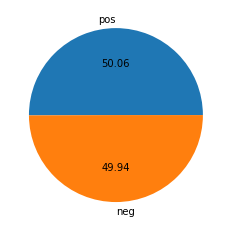

In [293]:
import matplotlib.pyplot as plt
plt.pie(df_ht['target'].value_counts(),labels=['pos','neg'],autopct="%0.2f")

In [294]:
import nltk

In [295]:
!pip3 install nltk

In [296]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/neelchoksi19bce0990/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [297]:
df_ht['num_characters'] = df_ht['text'].apply(len)

In [298]:
df_ht.head()

text  target  num_characters
0  One of the other reviewers has mentioned that ...       1            1761
1  A wonderful little production. <br /><br />The...       1             998
2  I thought this was a wonderful way to spend ti...       1             926
3  Basically there's a family where a little boy ...       0             748
4  Petter Mattei's "Love in the Time of Money" is...       1            1317

In [299]:
df_ht['num_words'] = df_ht['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [300]:
df_ht.head()

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   
2  I thought this was a wonderful way to spend ti...       1             926   
3  Basically there's a family where a little boy ...       0             748   
4  Petter Mattei's "Love in the Time of Money" is...       1            1317   

   num_words  
0        380  
1        201  
2        205  
3        175  
4        283

In [301]:
df_ht['num_sent'] = df_ht['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [302]:
df_ht.head()

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   
2  I thought this was a wonderful way to spend ti...       1             926   
3  Basically there's a family where a little boy ...       0             748   
4  Petter Mattei's "Love in the Time of Money" is...       1            1317   

   num_words  num_sent  
0        380        10  
1        201         7  
2        205         4  
3        175         6  
4        283         9

In [303]:
df_ht[['num_characters','num_words','num_sent']].describe()

num_characters    num_words     num_sent
count     6994.000000  6994.000000  6994.000000
mean      1317.295110   281.201172    10.684015
std        993.911776   209.690160     7.551886
min         80.000000    18.000000     1.000000
25%        698.000000   151.000000     6.000000
50%        968.000000   208.000000     9.000000
75%       1615.750000   345.000000    13.000000
max      10363.000000  2300.000000    91.000000

In [304]:
# pos text describe 
df_ht[df_ht['target'] == 1][['num_characters','num_words','num_sent']].describe()

num_characters    num_words     num_sent
count     3493.000000  3493.000000  3493.000000
mean      1324.153163   279.795019    10.329230
std       1041.631260   216.793131     7.394802
min        139.000000    29.000000     1.000000
25%        688.000000   148.000000     6.000000
50%        964.000000   206.000000     8.000000
75%       1628.000000   345.000000    13.000000
max      10363.000000  2300.000000    91.000000

In [305]:
# neg text describe 
df_ht[df_ht['target'] == 0][['num_characters','num_words','num_sent']].describe()


num_characters    num_words     num_sent
count     3501.000000  3501.000000  3501.000000
mean      1310.452728   282.604113    11.037989
std        944.000029   202.376406     7.690178
min         80.000000    18.000000     1.000000
25%        712.000000   154.000000     6.000000
50%        973.000000   211.000000     9.000000
75%       1607.000000   344.000000    14.000000
max       6230.000000  1464.000000    62.000000

In [306]:
import seaborn as sns 

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

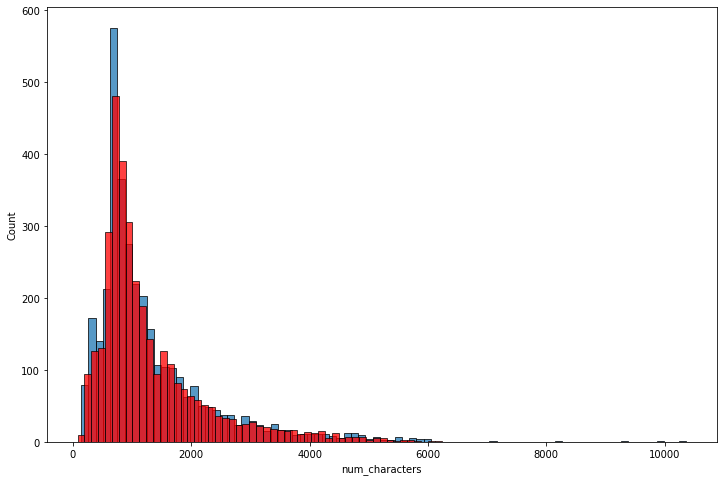

In [307]:
plt.figure(figsize=(12,8))
sns.histplot(df_ht[df_ht['target'] == 1]['num_characters'])
sns.histplot(df_ht[df_ht['target'] == 0]['num_characters'],color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

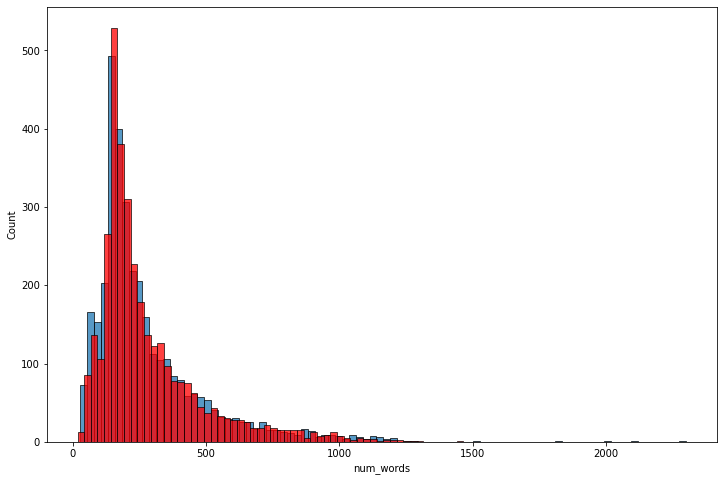

In [308]:
plt.figure(figsize=(12,8))
sns.histplot(df_ht[df_ht['target'] == 1]['num_words'])
sns.histplot(df_ht[df_ht['target'] == 0]['num_words'],color="red")

<AxesSubplot:xlabel='num_sent', ylabel='Count'>

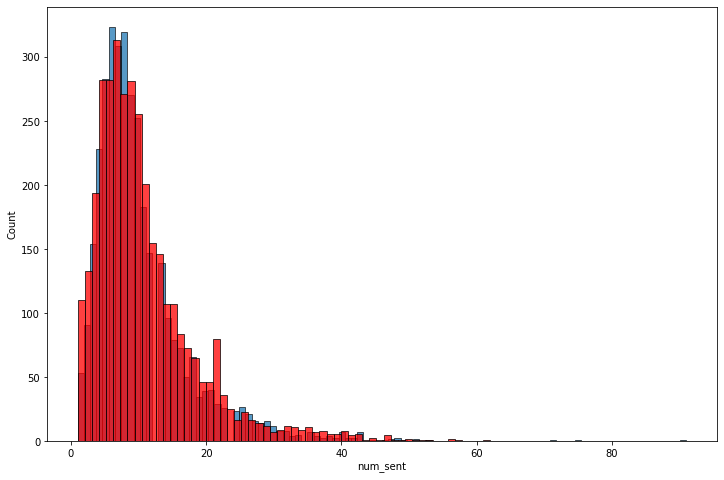

In [309]:
plt.figure(figsize=(12,8))
sns.histplot(df_ht[df_ht['target'] == 1]['num_sent'])
sns.histplot(df_ht[df_ht['target'] == 0]['num_sent'],color="red")

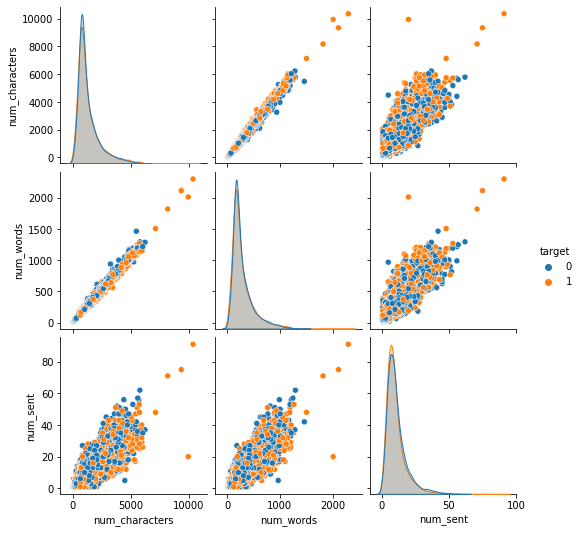

In [310]:
sns.pairplot(df_ht,hue='target')

<AxesSubplot:>

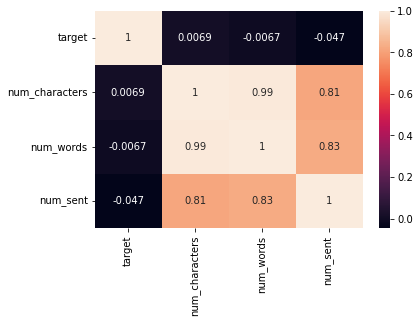

In [311]:
sns.heatmap(df_ht.corr(),annot=True)

In [312]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [313]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [314]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
ps.stem('swimming')

'swim'

In [315]:
# Data preprocessing 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text :
        if i.isalnum():
            y.append(i)
    
    text = y[:] 
    y.clear()
    
    for i in text : 
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text : 
        y.append(ps.stem(i))
            
    return " ".join(y)

In [316]:
transform_text("hi Neel how are you ml swimming;")

'hi neel ml swim'

In [317]:
df_ht['transformed_text']= df_ht['text'].apply(transform_text)

In [318]:
df_ht.head(3)

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   
2  I thought this was a wonderful way to spend ti...       1             926   

   num_words  num_sent                                   transformed_text  
0        380        10  one review mention watch 1 oz episod hook righ...  
1        201         7  wonder littl product br br film techniqu fashi...  
2        205         4  thought wonder way spend time hot summer weeke...

In [111]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white',collocations=False)

In [112]:
pos_wc = wc.generate(df_ht[df_ht['target'] == 1]['transformed_text'].str.cat(sep=" "))

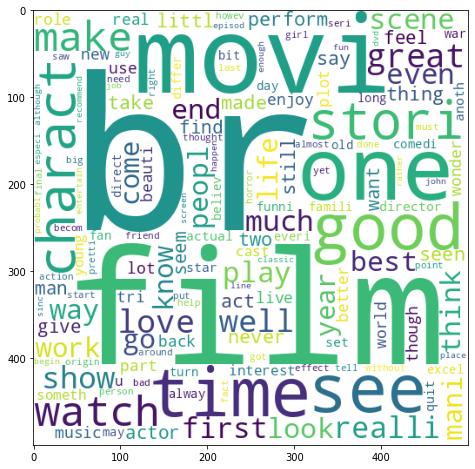

In [114]:
plt.figure(figsize=(12,8))
plt.imshow(pos_wc)

In [115]:
neg_wc = wc.generate(df_ht[df_ht['target'] == 0]['transformed_text'].str.cat(sep=" "))

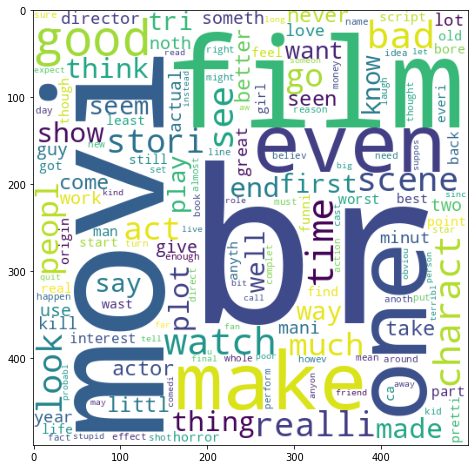

In [116]:
plt.figure(figsize=(12,8))
plt.imshow(neg_wc)

In [118]:
# top 30 pos words
pos_corpus=[]
for msg in df_ht[df_ht['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        pos_corpus.append(word)

In [119]:
len(pos_corpus)

418945

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


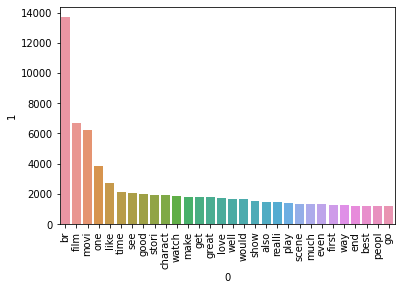

In [122]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(pos_corpus).most_common(30))[0],pd.DataFrame(Counter(pos_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [128]:
# top 30 neg words
neg_corpus=[]
for msg in df_ht[df_ht['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        neg_corpus.append(word)

In [129]:
len(neg_corpus)

414276

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


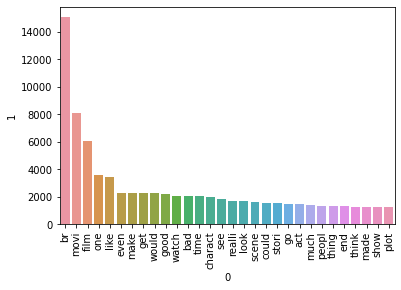

In [130]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(neg_corpus).most_common(30))[0],pd.DataFrame(Counter(neg_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [131]:
# Model building 
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer()

In [132]:
X = cv.fit_transform(df_ht['transformed_text']).toarray()

In [133]:
X.shape

(6994, 29938)

In [134]:
y = df_ht['target'].values

In [135]:
y.shape

(6994,)

In [136]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [154]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.6118656182987848
[[487 198]
 [345 369]]
0.6507936507936508


In [155]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8456040028591851
[[599  86]
 [130 584]]
0.8716417910447761


In [156]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8448892065761258
[[605  80]
 [137 577]]
0.878234398782344


In [157]:
# using tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf = TfidfVectorizer()

In [158]:
X = tfidf.fit_transform(df_ht['transformed_text']).toarray()

In [159]:
y = df_ht['target'].values

In [160]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [161]:
print("GNB")
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

print("MNB")
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

print("BNB")
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

GNB
0.6204431736954967
[[447 238]
 [293 421]]
0.6388467374810318
MNB
0.8570407433881344
[[627  58]
 [142 572]]
0.9079365079365079
BNB
0.8448892065761258
[[605  80]
 [137 577]]
0.878234398782344


In [164]:
# trying all models 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

/home/neelchoksi19bce0990/.local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [165]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators = 50,random_state=2)

In [166]:
clfs = {
    'SVC': svc,
    'KNC': knc,
    'MNB': mnb,
    'DTC': dtc,
    'LRC': lrc,
    'RFC': rfc,
    'AdaBoost': abc,
    'BagClas': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    
}

In [167]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [168]:
train_classifier(svc,X_train,y_train,X_test,y_test)

KeyboardInterrupt: 

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy:", current_accuracy)
    print("Precision:",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [ ]:
performance_df 

In [ ]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [ ]:
sns.catplot(x='Algorithm',y='value',hue='variable',data =performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# PyData - ANN, LSTM, GRU 

In [169]:
#Bow text classif 
import pandas as pd
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,Dataset 
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm, tqdm_notebook

In [170]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [172]:
df_ht.head(2)

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   

   num_words  num_sent                                   transformed_text  
0        380        10  one review mention watch 1 oz episod hook righ...  
1        201         7  wonder littl product br br film techniqu fashi...

In [204]:
df_ht.target.tolist()

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,


In [205]:
class Sequences(Dataset):
    def __init__(self,df_ht):
        df = df_ht.copy()
        self.vectorizer = CountVectorizer(stop_words='english',max_df=0.99 , min_df=0.005)
        self.sequences = self.vectorizer.fit_transform(df.transformed_text.tolist())
        self.labels = df_ht.target.tolist()
        self.token2idx = self.vectorizer.vocabulary_
        self.idx2token = {idx: token for token , idx in self.token2idx.items()}
    
    def __getitem__(self,i):
        return self.sequences[i,:].toarray(),self.labels[i]
    def __len__(self):
        return self.sequences.shape[0]
    
        

In [206]:
dataset = Sequences(df_ht)

In [207]:
train_loader = DataLoader(dataset,batch_size=2000)

In [208]:
print(dataset[1][0].shape)

(1, 2503)


In [209]:
class BowClassif(nn.Module):
    def __init__(self,vocab_size,hidden1,hidden2):
        super(BowClassif,self).__init__()
        self.fc1 = nn.Linear(vocab_size,hidden1)
        self.fc2 = nn.Linear(hidden1,hidden2)
        self.fc3 = nn.Linear(hidden2,1)
        
    def forward(self,inputs):
        x = F.relu(self.fc1(inputs.squeeze(1).float()))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [210]:
model = BowClassif(len(dataset.token2idx),128,64)
model

BowClassif(
  (fc1): Linear(in_features=2503, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

In [211]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],lr=0.001)

In [212]:
model.train()
train_losses = []
for epoch in range(10):
    progress_bar = tqdm_notebook(train_loader,leave=False)
    losses = [] 
    total = 0 
    for inputs,target in progress_bar : 
        model.zero_grad()
        
        output = model(inputs)
        loss = criterion(output.squeeze(),target.float())
        
        loss.backward()
        
        nn.utils.clip_grad_norm_(model.parameters(),3)
        
        optimizer.step()
        
        progress_bar.set_description(f'Loss: {loss.item():.3f}')
        
        losses.append(loss.item())
        total+=1
        
    epoch_loss = sum(losses) / total 
    train_losses.append(epoch_loss)
    
    tqdm.write(f'Epoch #{epoch}\t Train loss : {epoch_loss:.3f}')

/tmp/ipykernel_8345/1951017297.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  progress_bar = tqdm_notebook(train_loader,leave=False)


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #0	 Train loss : 0.686


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #1	 Train loss : 0.642


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #2	 Train loss : 0.566


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #3	 Train loss : 0.473


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #4	 Train loss : 0.383


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #5	 Train loss : 0.311


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #6	 Train loss : 0.259


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #7	 Train loss : 0.222


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #8	 Train loss : 0.193


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch #9	 Train loss : 0.170


In [217]:
def predict_sentiment(text):
    model.eval()
    with torch.no_grad():
        test_vector = torch.LongTensor(dataset.vectorizer.transform([text]).toarray())
        
        output = model(test_vector)
        prediction = torch.sigmoid(output).item()
        
        return prediction
        print(prediction)

In [218]:
test_text = """
This poor excuse for a movie is terrible. It has been 'so good it's bad' for a
while, and the high ratings are a good form of sarcasm, I have to admit. But
now it has to stop. Technically inept, spoon-feeding mundane messages with the
artistic weight of an eighties' commercial, hypocritical to say the least, it
deserves to fall into oblivion. Mr. Derek, I hope you realize you are like that
weird friend that everybody know is lame, but out of kindness and Christian
duty is treated like he's cool or something. That works if you are a good
decent human being, not if you are a horrible arrogant bully like you are. Yes,
Mr. 'Daddy' Derek will end on the history books of the internet for being a
delusional sour old man who thinks to be a good example for kids, but actually
has a poster of Kim Jong-Un in his closet. Destroy this movie if you all have a
conscience, as I hope IHE and all other youtube channel force-closed by Derek
out of SPITE would destroy him in the courts.This poor excuse for a movie is
terrible. It has been 'so good it's bad' for a while, and the high ratings are
a good form of sarcasm, I have to admit. But now it has to stop. Technically
inept, spoon-feeding mundane messages with the artistic weight of an eighties'
commercial, hypocritical to say the least, it deserves to fall into oblivion.
Mr. Derek, I hope you realize you are like that weird friend that everybody
know is lame, but out of kindness and Christian duty is treated like he's cool
or something. That works if you are a good decent human being, not if you are a
horrible arrogant bully like you are. Yes, Mr. 'Daddy' Derek will end on the
history books of the internet for being a delusional sour old man who thinks to
be a good example for kids, but actually has a poster of Kim Jong-Un in his
closet. Destroy this movie if you all have a conscience, as I hope IHE and all
other youtube channel force-closed by Derek out of SPITE would destroy him in
the courts.
"""
predict_sentiment(test_text)

0.0012416525278240442

In [219]:
df_ht['ann_target']= df_ht['transformed_text'].apply(predict_sentiment)

In [220]:
df_ht.head(2)

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   

   num_words  num_sent                                   transformed_text  \
0        380        10  one review mention watch 1 oz episod hook righ...   
1        201         7  wonder littl product br br film techniqu fashi...   

   ann_target  
0    0.988617  
1    0.973555

In [222]:
# rnn 
import pandas as pd 
import torch 
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim 
from sklearn.feature_extraction.text import CountVectorizer
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader , Dataset
from tqdm import tqdm, tqdm_notebook

In [223]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [224]:
device

device(type='cpu')

In [373]:
class Sequences(Dataset):
    def __init__(self,df_ht,max_seq_len):
        self.max_seq_len = max_seq_len
        df = df_ht.copy()
        vectorizer = CountVectorizer(stop_words='english',min_df=0.015)
        vectorizer.fit(df.transformed_text.tolist())
        
        self.token2idx = vectorizer.vocabulary_
        self.token2idx['<PAD>'] = max(self.token2idx.values()) + 1
        
        tokenizer = vectorizer.build_analyzer()
        self.encode = lambda x: [self.token2idx[token] for token in tokenizer(x) if token in self.token2idx]
        self.pad = lambda x: x + (max_seq_len - len(x)) * [self.token2idx['<PAD>']]
        
        sequences = [self.encode(sequence)[:max_seq_len] for sequence in df.transformed_text.tolist()]
        sequences, self.labels = zip(*[(sequence,label) for sequence,label in zip(sequences,df.target.tolist()) if sequence])
        self.sequences = [self.pad(sequence) for sequence in sequences]
        
    def __getitem__(self,i):
        assert len(self.sequences[i]) == self.max_seq_len
        return self.sequences[i], self.labels[i] 
    
    def __len__(self):
        return len(self.sequences)
        

In [381]:
dataset = Sequences(df_ht, max_seq_len = 256)

In [382]:
len(dataset.token2idx)

1049

In [383]:
def collate(batch):
    inputs = torch.LongTensor([item[0] for item in batch])
    target = torch.FloatTensor([item[1] for item in batch])
    return inputs,target

batch_size = 1500
train_loader = DataLoader(dataset,batch_size = batch_size, collate_fn = collate)

In [384]:
class RNN(nn.Module):
    def __init__(
        self,
        vocab_size,
        batch_size , 
        embedding_dimension = 100,
        hidden_size = 256, 
        n_layers = 1,
        device='cpu'
    ):
        super(RNN,self).__init__()
        self.n_layers = n_layers 
        self.hidden_size = hidden_size
        self.device = device
        self.batch_size = batch_size 
        
        self.encoder = nn.Embedding(vocab_size, embedding_dimension)
        self.rnn = nn.GRU(
            embedding_dimension,
            hidden_size,
            num_layers = n_layers,
            batch_first = True
        )
        self.decoder = nn.Linear(hidden_size,1)
        
    def init_hidden(self):
        return torch.randn(self.n_layers, self.batch_size, self.hidden_size).to(self.device)
    
    def forward(self,inputs):
        batch_size = inputs.size(0)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        
        encoded = self.encoder(inputs)
        output, hidden = self.rnn(encoded,self.init_hidden())
        output = self.decoder(output[:,:,-1]).squeeze()
        return output
    
    

In [385]:
model = RNN(
    hidden_size = 256, 
    vocab_size = len(dataset.token2idx),
    device= device,
    batch_size = batch_size
)
model = model.to(device)
model

RNN(
  (encoder): Embedding(1049, 100)
  (rnn): GRU(100, 256, batch_first=True)
  (decoder): Linear(in_features=256, out_features=1, bias=True)
)

In [386]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],lr=0.001)


In [387]:
model.train()
train_losses = []
for epoch in range(10):
    progress_bar = tqdm_notebook(train_loader,leave=False)
    losses = []
    total = 0
    for inputs,target in progress_bar:
        inputs,target = inputs.to(device), target.to(device)
        
        model.zero_grad()
        
        output = model(inputs)
        
        loss = criterion(output,target)
        
        loss.backward()
        
        nn.utils.clip_grad_norm_(model.parameters(),3)
        
        optimizer.step()
        
        progress_bar.set_description(f'Loss : {loss.item():.3f}')
        
        losses.append(loss.item())
        total +=1
        
    epoch_loss = sum(losses)/ total
    train_losses.append(epoch_loss)
    
    tqdm.write(f'Epoch #{epoch + 1}\t Train Loss : {epoch_loss:.3f}')
    

/tmp/ipykernel_8345/1075755979.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  progress_bar = tqdm_notebook(train_loader,leave=False)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #1	 Train Loss : 0.697


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #2	 Train Loss : 0.693


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #3	 Train Loss : 0.692


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #4	 Train Loss : 0.691


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #5	 Train Loss : 0.689


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #6	 Train Loss : 0.686


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #7	 Train Loss : 0.679


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #8	 Train Loss : 0.660


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #9	 Train Loss : 0.610


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch #10	 Train Loss : 0.561


In [403]:
def predict_sentiment(text):
    if(len(text.split())>256):
#         print(text.split())
#         print("hi")
        arr = text.split()
        new_arr = []
        for i in range(256):
            new_arr.append(arr[i])
        text = " ".join(new_arr)
#         print(text)
    model.eval()
    with torch.no_grad():
        test_vector= torch.LongTensor([dataset.pad(dataset.encode(text))]).to(device)
        
        output = model(test_vector)
        prediction = torch.sigmoid(output).item()
        
        return prediction
        print(prediction)


In [404]:
test_text = """
This poor excuse for a movie is terrible. It has been 'so good it's bad' for a
while, and the high ratings are a good form of sarcasm, I have to admit. But
now it has to stop. Technically inept, spoon-feeding mundane messages with the
artistic weight of an eighties' commercial, hypocritical to say the least, it
deserves to fall into oblivion. Mr. Derek, I hope you realize you are like that
weird friend that everybody know is lame, but out of kindness and Christian
duty is treated like he's cool or something. That works if you are a good
decent human being, not if you are a horrible arrogant bully like you are. Yes,
Mr. 'Daddy' Derek will end on the history books of the internet for being a
delusional sour old man who thinks to be a good example for kids, but actually
has a poster of Kim Jong-Un in his closet. Destroy this movie if you all have a
conscience, as I hope IHE and all other youtube channel force-closed by Derek
out of SPITE would destroy him in the courts.This poor excuse for a movie is
terrible. It has been 'so good it's bad' for a while, and the high ratings are
a good form of sarcasm, I have to admit. But now it has to stop. Technically
inept, spoon-feeding mundane messages with the artistic weight of an eighties'
commercial, hypocritical to say the least, it deserves to fall into oblivion.
Mr. Derek, I hope you realize you are like that weird friend that everybody
know is lame, but out of kindness and Christian duty is treated like he's cool
or something. That works if you are a good decent human being, not if you are a
horrible arrogant bully like you are. Yes, Mr. 'Daddy' Derek will end on the
history books of the internet for being a delusional sour old man who thinks to
be a good example for kids, but actually has a poster of Kim Jong-Un in his
closet. Destroy this movie if you all have a conscience, as I hope IHE and all
other youtube channel force-closed by Derek out of SPITE would destroy him in
the courts.
"""
predict_sentiment(test_text)

0.21437016129493713

In [405]:
df_ht['gru_target']= df_ht['transformed_text'].apply(predict_sentiment)

In [406]:
df_ht.head(3)

text  target  num_characters  \
0  One of the other reviewers has mentioned that ...       1            1761   
1  A wonderful little production. <br /><br />The...       1             998   
2  I thought this was a wonderful way to spend ti...       1             926   

   num_words  num_sent                                   transformed_text  \
0        380        10  one review mention watch 1 oz episod hook righ...   
1        201         7  wonder littl product br br film techniqu fashi...   
2        205         4  thought wonder way spend time hot summer weeke...   

   gru_target  
0    0.522483  
1    0.635523  
2    0.588997